# EDA ( BaseTable_2.csv 사용 )

## 0. 라이브러리 설치 및 데이터 불러오기

In [1]:
# 필요 라이브러리 설치
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 load
data = pd.read_csv('/Users/limdonggeon/Desktop/KPMG/Work/Law/BaseTable_2.csv')

/var/folders/fs/zfypqyv96hs22x794hfx0ycm0000gn/T/ipykernel_35948/1174812850.py:2: DtypeWarning: Columns (4,5,13,16,17,18,19,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/limdonggeon/Desktop/KPMG/Work/Law/BaseTable_2.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861624 entries, 0 to 861623
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   소관부처명      861624 non-null  object 
 1   법령명        861624 non-null  object 
 2   법령구분       861624 non-null  int64  
 3   조번호        861043 non-null  object 
 4   항번호        666511 non-null  object 
 5   호번호        504874 non-null  object 
 6   조문제목       861624 non-null  object 
 7   조문         861624 non-null  object 
 8   사무판단       861624 non-null  int64  
 9   사무판단근거     700810 non-null  object 
 10  사무명        60068 non-null   object 
 11  수행주체       60069 non-null   object 
 12  사무유형       60026 non-null   object 
 13  위임사무판단     761044 non-null  object 
 14  위임근거규정     5292 non-null    object 
 15  수임기관       4398 non-null    object 
 16  특행기관       93064 non-null   object 
 17  재위임사무판단    702426 non-null  object 
 18  재위임근거규정    53 non-null      object 
 19  재수임기관      13 non-null 

# 그래프 그리기

## 1) 사무판단 개수 파악

- 사무판단 종류: 3개
    - 사무판단이 0인 경우 : 801598개
    - 사무판단이 1인 경우 : 60023개
    - 사무판단이 2인 경우 : 3개

- 사무판단이 2인 경우 빼고 0과 1인 경우만 비교하기

In [4]:
def judgment_graph(df):
    # 전체 갯수
    N = len(df)
    
    # 0의 비율, 1의 비율 계산하기
    ratio_0 = (len(df[df['사무판단'] == 0]))/N *100
    print(f" 0의 비율 : {ratio_0}")
    ratio_1 = (len(df[df['사무판단'] == 1]))/N *100
    print(f" 1의 비율 : {ratio_1}")
    
    # pie chart 생성
    ratio = [ratio_0, ratio_1]
    labels = [0,1]
    explode = [0, 0.10]
    colors = sns.color_palette('pastel')[3:5]
    plt.pie(ratio, colors = colors, autopct='%.0f%%', startangle= 120, explode=explode)
    plt.legend(['사무가 아니다', '사무이다'], bbox_to_anchor=(1.3, 1))
    plt.title('\n\n 사무판단 비율 \n')
    plt.show()

 0의 비율 : 93.03338811360872
 1의 비율 : 6.966263706674837


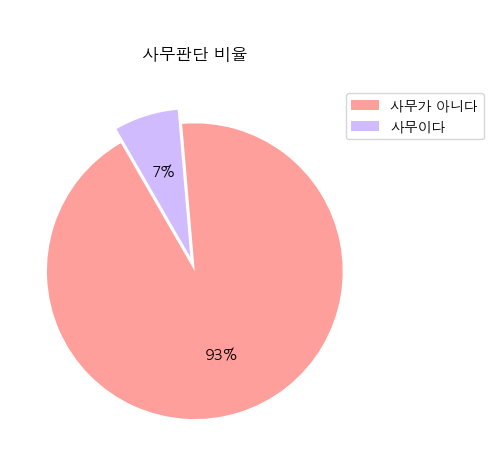

In [5]:
judgment_graph(data)

##

## 2) 소관부처명에 따른 사무판단

- 소관부처명의 종류 : 122개
- 사무가 가장 많은 5개 소관부처명 파악
- 사무 비율이 가장 큰 5개 소관부처명 파악

### 사무가 가장 많은 소관부처명 파악

In [6]:
def num_department_judgment_graph(df):
    # 각 소관부처명 별 사무판단 갯수 파악
    department_judgment = []
    for ii in df['소관부처명'].unique():
        department_count_0 = len(df.loc[(df['소관부처명']==ii) & (df['사무판단']==0)])
        department_count_1 = len(df.loc[(df['소관부처명']==ii) & (df['사무판단']==1)])
        # [1인 갯수, 0인 갯수, 1인 비율, 소관부처명]
        department_judgment.append([department_count_1, department_count_0, department_count_1/(department_count_0+department_count_1), ii])
    
    # 사무가 가장 많은 소관부처명 파악
    department_judgment.sort(key=lambda x:x[0], reverse = True)
    
    num_department_judgment = []
    num_department = []
    for i in range(len(department_judgment)):
        num_department_judgment.append(department_judgment[i][0])
        num_department.append(department_judgment[i][3])
        
    # 사무가 많은 소관부처명 순서대로 막대 그래프
    fig, ax = plt.subplots(figsize=(7.5, 4.5))
    colors = sns.color_palette('pastel')[4]
    plt.bar(range(len(num_department_judgment)), num_department_judgment, color=colors)
    plt.title('\n\n\n 소관부처별 사무판단 개수 파악\n')
    plt.ylabel('개수')
    plt.xlim([-1,len(num_department_judgment)])
    plt.xticks([])
    plt.ylim([0,6000]);
    plt.yticks(np.arange(0, 6000, step=1000));
    
    # 사무가 가장 많은 소관부처명 5개 순서대로 막대 그래프
    fig, ax = plt.subplots(figsize=(7.5, 4.5))
    colors = sns.color_palette('pastel')[4]
    bar = plt.bar(range(5), num_department_judgment[:5], color=colors)
    plt.title('\n\n\n 소관부처별 사무판단 Top5 개수 파악\n')
    plt.ylabel('개수')
    plt.xlim([-0.5,4.5])
    plt.xticks(np.arange(0, 5, 1), labels = [num_department[0],num_department[1],num_department[2],num_department[3],num_department[4]])
    plt.ylim([0,6000]);
    plt.yticks(np.arange(0, 6000, step=1000));
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % height, ha='center', va='bottom', size = 10)


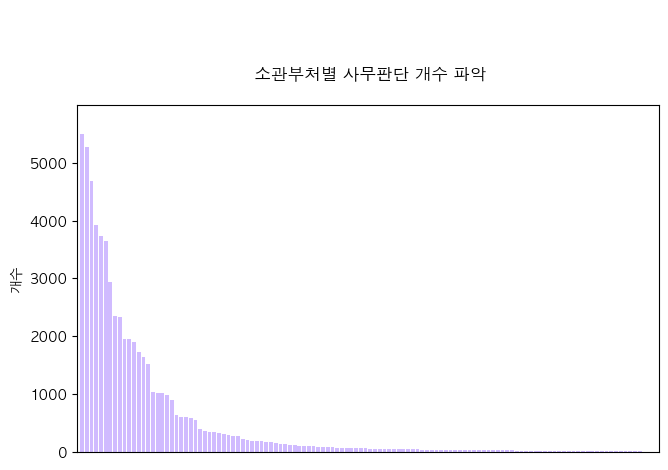

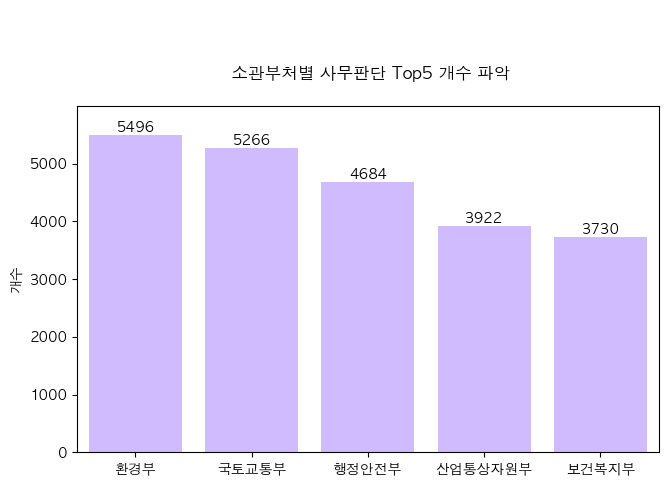

In [7]:
num_department_judgment_graph(data)

##

### 사무비율이 가장 큰 소관부처명 파악

In [8]:
def ratio_department_judgment_graph(df):
    # 각 소관부처명 별 사무판단 갯수 파악
    department_judgment = []
    for ii in df['소관부처명'].unique():
        department_count_0 = len(df.loc[(df['소관부처명']==ii) & (df['사무판단']==0)])
        department_count_1 = len(df.loc[(df['소관부처명']==ii) & (df['사무판단']==1)])
        # [1인 갯수, 0인 갯수, 1인 비율, 소관부처명]
        department_judgment.append([department_count_1, department_count_0, department_count_1/(department_count_0+department_count_1), ii])
    
    # 사무비율이 가장 큰 소관부처명 파악
    department_judgment.sort(key=lambda x:x[2], reverse = True)
    
    ratio_department_judgment = []
    ratio_department = []
    for i in range(len(department_judgment)):
        ratio_department_judgment.append(department_judgment[i][2])
        ratio_department.append(department_judgment[i][3])
        
    # 사무가 많은 소관부처명 순서대로 막대 그래프
    fig, ax = plt.subplots(figsize=(7.5, 4.5))
    colors = sns.color_palette('pastel')[4]
    plt.bar(range(len(ratio_department_judgment)), ratio_department_judgment, color=colors)
    plt.title('\n\n\n 소관부처별 사무판단 비율 파악\n')
    plt.ylabel('비율')
    plt.xlim([-1,len(ratio_department_judgment)])
    plt.xticks([])
    plt.ylim([0,0.4]);
    plt.yticks(np.arange(0, 0.5, step=0.1));
    
    # 사무가 가장 많은 소관부처명 5개 순서대로 막대 그래프
    fig, ax = plt.subplots(figsize=(7.5, 4.5))
    colors = sns.color_palette('pastel')[4]
    bar = plt.bar(range(5), ratio_department_judgment[:5], color=colors)
    plt.title('\n\n\n 소관부처별 사무판단 Top5 비율 파악\n')
    plt.ylabel('비율')
    plt.xlim([-0.5,4.5])
    plt.xticks(np.arange(0, 5, 1), labels = [ratio_department[0].replace(',','\n'),ratio_department[1].replace(',','\n'),ratio_department[2].replace(',','\n'),ratio_department[3].replace(',','\n'),ratio_department[4].replace(',','\n')])
    plt.ylim([0,0.4]);
    plt.yticks(np.arange(0, 0.5, step=0.1));
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.3f' % height, ha='center', va='bottom', size = 10)

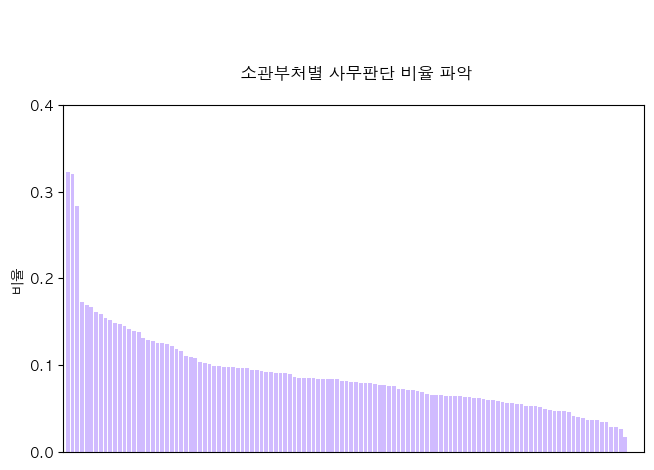

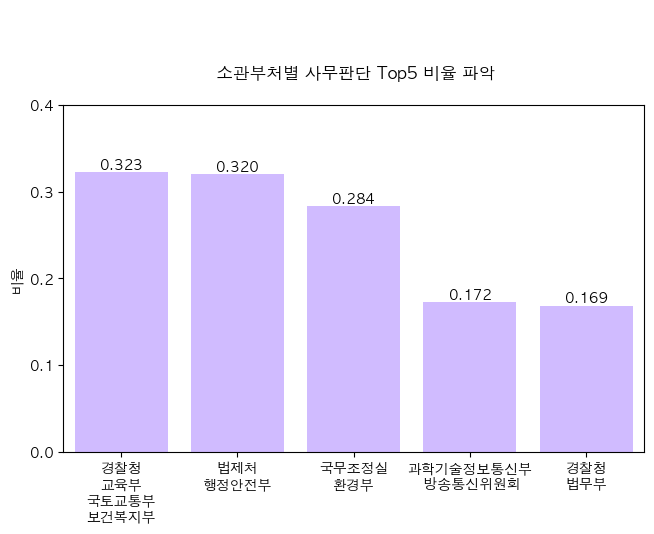

In [9]:
ratio_department_judgment_graph(data)

##

## 3) 법령명에 따른 사무판단

- 법령명의 종류 : 4324개
- 사무가 가장 많은 5개 법령명 파악
- 사무 비율이 가장 큰 5개 법령명 파악

### 사무가 가장 많은 법령명 파악

In [10]:
def num_lawname_judgment_graph(df):
    # 각 법령명 별 사무판단 갯수 파악
    lawname_judgment = []
    for ii in df['법령명'].unique():
        lawname_count_0 = len(df.loc[(df['법령명']==ii) & (df['사무판단']==0)])
        lawname_count_1 = len(df.loc[(df['법령명']==ii) & (df['사무판단']==1)])
        # [1인 갯수, 0인 갯수, 1인 비율, 법령명]
        lawname_judgment.append([lawname_count_1, lawname_count_0, lawname_count_1/(lawname_count_0+lawname_count_1), ii])
    
    # 사무가 가장 많은 법령명 파악
    lawname_judgment.sort(key=lambda x:x[0], reverse = True)
    
    num_lawname_judgment = []
    num_lawname = []
    for i in range(len(lawname_judgment)):
        num_lawname_judgment.append(lawname_judgment[i][0])
        num_lawname.append(lawname_judgment[i][3])
        
    # 사무가 많은 법령명 순서대로 막대 그래프
    fig, ax = plt.subplots(figsize=(7.5, 4.5))
    colors = sns.color_palette('pastel')[4]
    plt.bar(range(len(num_lawname_judgment)), num_lawname_judgment, color=colors)
    plt.title('\n\n\n 법령명별 사무판단 개수 파악\n')
    plt.ylabel('개수')
    plt.xlim([-1,len(num_lawname_judgment)])
    plt.xticks([])
    plt.ylim([0,400]);
    plt.yticks(np.arange(0, 400, step=100));
    
    # 사무가 가장 많은 법령명 5개 순서대로 막대 그래프
    fig, ax = plt.subplots(figsize=(7.5, 4.5))
    colors = sns.color_palette('pastel')[4]
    bar = plt.bar(range(5), num_lawname_judgment[:5], color=colors)
    plt.title('\n\n\n 법령명별 사무판단 Top5 개수 파악\n')
    plt.ylabel('개수')
    plt.xlim([-0.5,4.5])
    plt.xticks(np.arange(0, 5, 1), labels = ['\n'+num_lawname[0],num_lawname[1],'\n\n'+num_lawname[2],num_lawname[3],'\n'+num_lawname[4]])
    plt.ylim([0,400]);
    plt.yticks(np.arange(0, 400, step=100));
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % height, ha='center', va='bottom', size = 10)

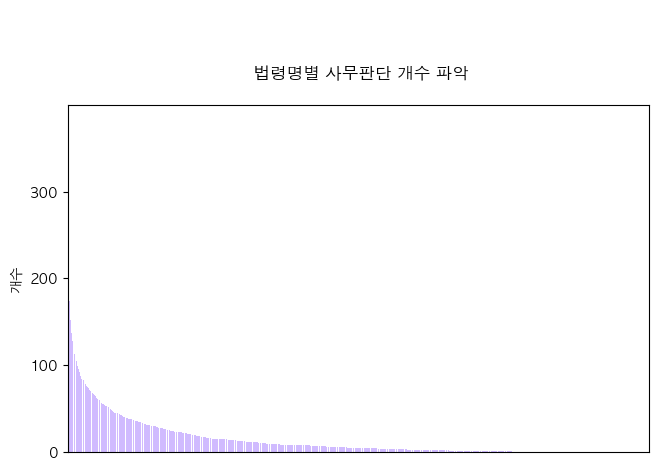

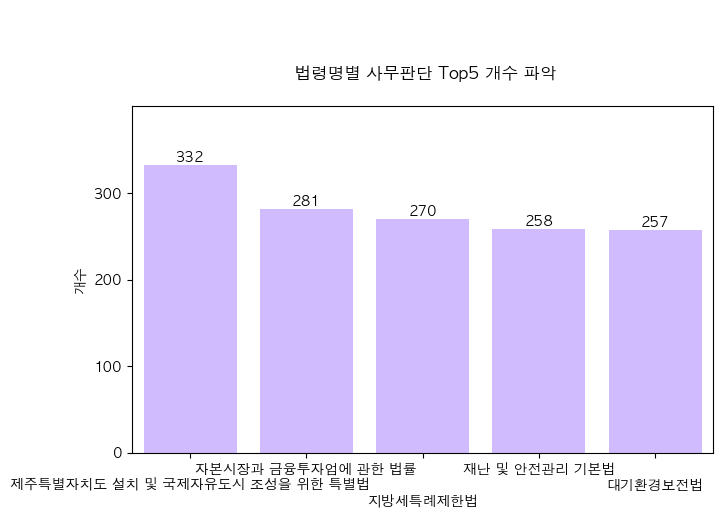

In [11]:
num_lawname_judgment_graph(data)

##

### 사무비율이 가장 큰 법령명 파악

In [12]:
def ratio_lawname_judgment_graph(df):
    # 각 법령명 별 사무판단 갯수 파악
    lawname_judgment = []
    for ii in df['법령명'].unique():
        lawname_count_0 = len(df.loc[(df['법령명']==ii) & (df['사무판단']==0)])
        lawname_count_1 = len(df.loc[(df['법령명']==ii) & (df['사무판단']==1)])
        # [1인 갯수, 0인 갯수, 1인 비율, 법령명]
        lawname_judgment.append([lawname_count_1, lawname_count_0, lawname_count_1/(lawname_count_0+lawname_count_1), ii])
    
    # 사무가 가장 많은 법령명 파악
    lawname_judgment.sort(key=lambda x:x[2], reverse = True)
    
    ratio_lawname_judgment = []
    ratio_lawname = []
    for i in range(len(lawname_judgment)):
        ratio_lawname_judgment.append(lawname_judgment[i][2])
        ratio_lawname.append(lawname_judgment[i][3])

    # 사무가 많은 법령명 순서대로 막대 그래프
    fig, ax = plt.subplots(figsize=(7.5, 4.5))
    colors = sns.color_palette('pastel')[4]
    plt.bar(range(len(ratio_lawname_judgment)), ratio_lawname_judgment, color=colors)
    plt.title('\n\n\n 법령명별 사무판단 비율 파악\n')
    plt.ylabel('비율')
    plt.xlim([-1,len(ratio_lawname_judgment)])
    plt.xticks([])
    plt.ylim([0,1.2]);
    plt.yticks(np.arange(0, 1.2, step=0.2));
    
    # 사무가 가장 많은 법령명 5개 순서대로 막대 그래프
    fig, ax = plt.subplots(figsize=(7.5, 4.5))
    colors = sns.color_palette('pastel')[4]
    bar = plt.bar(range(5), ratio_lawname_judgment[:5], color=colors)
    plt.title('\n\n\n 법령명별 사무판단 Top5 비율 파악\n')
    plt.ylabel('비율')
    plt.xlim([-0.5,4.5])
    plt.xticks(np.arange(0, 5, 1), labels = [ratio_lawname[0],'\n'+ratio_lawname[1],'\n\n'+ratio_lawname[2],ratio_lawname[3],'\n'+ratio_lawname[4]])
    plt.ylim([0,1.2]);
    plt.yticks(np.arange(0, 1.2, step=0.2));
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.3f' % height, ha='center', va='bottom', size = 10)

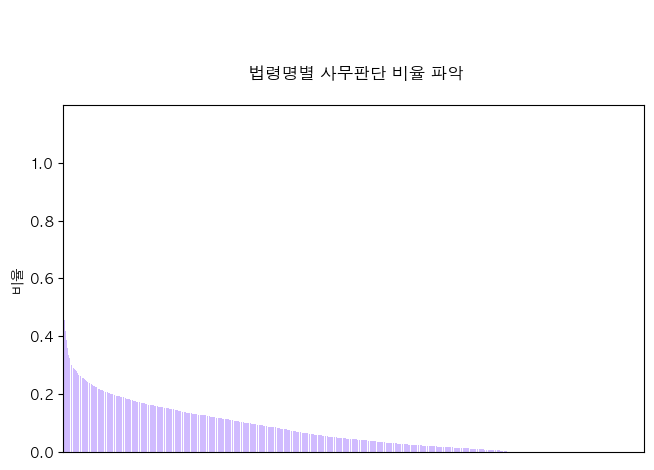

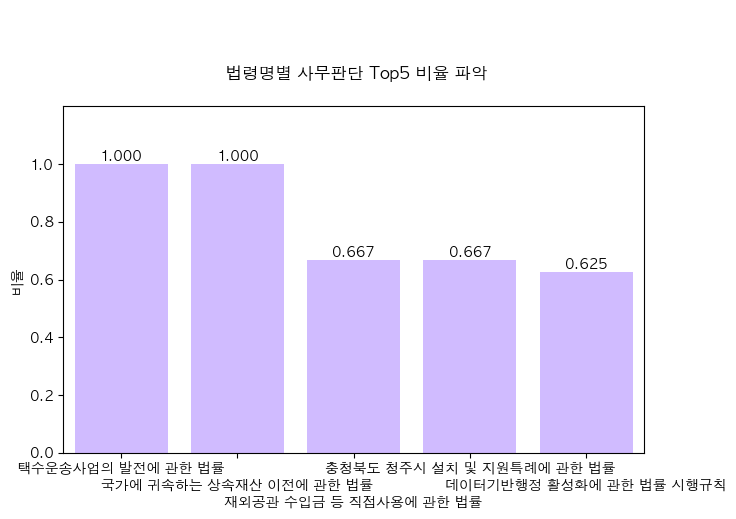

In [13]:
ratio_lawname_judgment_graph(data)

## 4) 법령구분에 따른 사무판단

- 법령구분 종류: 3개
    - 법령구분이 1인 경우 : 365424개
    - 법령구분이 2인 경우 : 319805개
    - 법령구분이 3인 경우 : 176395개


In [14]:
def lawclass_judgment_graph(df):
    groups = ['1', '2', '3']
    values1 = [len(df.loc[(df['법령구분']==1) & (df['사무판단']==0) ]), len(df.loc[(df['법령구분']==2) & (df['사무판단']==0) ]), len(df.loc[(df['법령구분']==3) & (df['사무판단']==0) ])]
    values2 = [len(df.loc[(df['법령구분']==1) & (df['사무판단']==1) ]), len(df.loc[(df['법령구분']==2) & (df['사무판단']==1) ]), len(df.loc[(df['법령구분']==3) & (df['사무판단']==1) ])]
    fig, ax = plt.subplots(figsize=(3, 5))
    colors = sns.color_palette('pastel')[3:5]

    # stack bar 로 구성
    ax.bar(groups, values1, color = colors[0])
    ax.bar(groups, values2, bottom = values1, color = colors[1])
    plt.title('법령구분에 따른 사무판단 여부 파악\n\n')
    plt.xlabel('법령구분')
    plt.ylabel('개수')
    plt.legend(['사무가 아니다', '사무이다'], bbox_to_anchor=(1.7, 1))
    plt.ylim([0,400000])
    plt.yticks(np.arange(0, 500000, step=100000))
    plt.show()

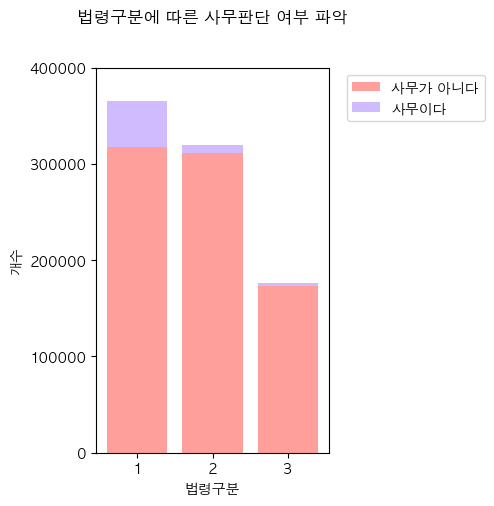

In [15]:
lawclass_judgment_graph(data)

In [16]:
# def law_work_count(i):
#     a = len(df.loc[(df['법령구분']==i) & (df['사무판단']==0), ])
#     b = len(df.loc[(df['법령구분']==i) & (df['사무판단']==1), ])
#     c = len(df.loc[(df['법령구분']==i) & (df['사무판단']==2), ])

#     print(f"법령 구분 {i}일때 ========")
#     print(f"사무x: {a}")
#     print(f"사무O: {b}")
#     print(f"애매: {c}")
    

#     result = [a, b, c]
#     return result

In [17]:
# result = []
# for i in range(1, 4):
#     result.append(law_work_count(i))
# result

In [18]:
# # 법령 구분에 따른 사무판단 비율 계산
# ratio_df = df.groupby(['법령구분', '사무판단']).size().unstack().T
# ratio_df = ratio_df.div(ratio_df.sum(axis=1), axis=0)

# # 비율을 시각화
# ratio_df.T.plot(kind='bar', stacked=True)
# plt.title('법령구분에 따른 사무판단 비율')
# plt.xlabel('법령구분')
# plt.ylabel('Administrative Decision')
# plt.show()